**Stock Market Price Predictor using Machine Learning**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Stock_Data_Last_5_Years.csv")

In [ ]:
df.head()

,Date,Close_AAPL,Close_AMZN,Close_GOOGL,Close_MSFT,Close_NVDA,High_AAPL,High_AMZN,High_GOOGL,High_MSFT,...,Open_AAPL,Open_AMZN,Open_GOOGL,Open_MSFT,Open_NVDA,Volume_AAPL,Volume_AMZN,Volume_GOOGL,Volume_MSFT,Volume_NVDA
0,2020-07-28,90.766754,150.016495,74.824768,193.907822,10.182646,92.029668,153.854507,75.937445,196.480198,...,91.852031,152.713501,75.887186,195.433971,10.340886,103625600,62534000,30910000,23251400,271636000
1,2020-07-29,92.506607,151.676498,75.813034,195.865891,10.431843,92.691545,151.957993,76.301695,196.432195,...,91.250993,151.549500,74.891939,194.368535,10.357333,90329200,59482000,22676000,19632600,284508000
2,2020-07-30,93.625931,152.593994,76.552505,195.712296,10.579865,93.730563,154.600006,76.677905,196.249821,...,91.676808,150.699997,74.542113,192.928752,10.341634,158130000,122566000,36042000,25079600,308880000
3,2020-07-31,103.427505,158.233994,74.043495,196.777740,10.580610,103.578373,162.341003,74.892934,196.864138,...,100.142470,162.199997,74.496332,196.192235,10.529276,374336800,161710000,91468000,51044000,386080000
4,2020-08-03,106.033646,155.594498,73.785233,207.844727,10.974840,108.661671,159.199997,74.530168,208.900561,...,105.315802,159.025497,74.195275,203.026318,10.697983,308151200,101494000,45482000,78983000,412720000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1115 non-null   object 
 1   Close_AAPL    1115 non-null   float64
 2   Close_AMZN    1115 non-null   float64
 3   Close_GOOGL   1115 non-null   float64
 4   Close_MSFT    1115 non-null   float64
 5   Close_NVDA    1115 non-null   float64
 6   High_AAPL     1115 non-null   float64
 7   High_AMZN     1115 non-null   float64
 8   High_GOOGL    1115 non-null   float64
 9   High_MSFT     1115 non-null   float64
 10  High_NVDA     1115 non-null   float64
 11  Low_AAPL      1115 non-null   float64
 12  Low_AMZN      1115 non-null   float64
 13  Low_GOOGL     1115 non-null   float64
 14  Low_MSFT      1115 non-null   float64
 15  Low_NVDA      1115 non-null   float64
 16  Open_AAPL     1115 non-null   float64
 17  Open_AMZN     1115 non-null   float64
 18  Open_GOOGL    1115 non-null 

In [ ]:
df.shape


(1115, 26)

In [ ]:
df.describe()


,Close_AAPL,Close_AMZN,Close_GOOGL,Close_MSFT,Close_NVDA,High_AAPL,High_AMZN,High_GOOGL,High_MSFT,High_NVDA,...,Open_AAPL,Open_AMZN,Open_GOOGL,Open_MSFT,Open_NVDA,Volume_AAPL,Volume_AMZN,Volume_GOOGL,Volume_MSFT,Volume_NVDA
count,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,...,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1.115000e+03,1.115000e+03,1.115000e+03,1.115000e+03,1.115000e+03
mean,161.977423,150.860247,124.993154,303.749297,42.404146,163.576460,152.723009,126.349798,306.583387,43.187359,...,161.827815,150.921206,124.925760,303.688676,42.411722,8.080690e+07,6.394147e+07,3.160920e+07,2.679622e+07,4.376174e+08
std,33.757833,30.874252,28.479128,74.038997,38.867564,33.785027,30.936402,28.667333,74.311098,39.590679,...,33.661000,30.897943,28.507880,74.097576,38.932826,4.101299e+07,2.949042e+07,1.324837e+07,1.043622e+07,1.807268e+08
min,90.766754,81.820000,70.134201,192.808212,10.182646,92.029668,83.480003,71.557390,195.040412,10.348610,...,91.250993,82.800003,69.800295,189.729259,10.340886,2.323470e+07,1.500750e+07,9.312000e+06,7.164500e+06,9.788400e+07
25%,137.183205,128.254997,102.485020,243.045349,15.595848,139.670088,130.254997,103.840050,244.850590,15.790379,...,137.164109,128.610001,102.358878,242.589679,15.523855,5.357315e+07,4.449210e+07,2.299620e+07,1.996635e+07,3.024574e+08
50%,158.634201,157.597000,125.012321,287.006104,23.420790,160.568221,159.369507,126.464885,288.841481,24.021835,...,158.343152,157.605499,125.330805,286.887943,23.465814,7.118640e+07,5.737200e+07,2.836090e+07,2.461510e+07,4.177350e+08
75%,181.268021,172.183754,142.094658,365.855118,47.889414,182.282623,174.075005,143.543731,368.727819,48.517012,...,181.039967,172.261749,142.373318,365.518296,48.055244,9.463260e+07,7.498000e+07,3.629930e+07,3.076305e+07,5.369155e+08
max,258.735504,232.929993,196.433777,464.854340,148.856064,259.814335,233.000000,201.188288,465.639777,152.865409,...,257.906429,232.389999,197.023087,464.297590,149.325985,3.743368e+08,2.726620e+08,1.232000e+08,9.042890e+07,1.543911e+09


In [ ]:
df.isnull().sum()


,0
Date,0
Close_AAPL,0
Close_AMZN,0
Close_GOOGL,0
Close_MSFT,0
Close_NVDA,0
High_AAPL,0
High_AMZN,0
High_GOOGL,0
High_MSFT,0


In [ ]:
# Select one stock for prediction (e.g., AAPL)
stock = 'AAPL'
df_stock = df[['Date', f'Open_{stock}', f'High_{stock}', f'Low_{stock}', f'Close_{stock}', f'Volume_{stock}']].copy()

In [ ]:
# Rename columns
df_stock.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']


In [ ]:
# Create 'Target' column as next day's closing price
df_stock['Target'] = df_stock['Close'].shift(-1)
df_stock.dropna(inplace=True)


In [ ]:
# Features and target
X = df_stock[['Open', 'High', 'Low', 'Volume']]
y = df_stock['Target']

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
 # Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=range(len(y_true)), y=y_true.values, label='Actual')
    sns.lineplot(x=range(len(y_pred)), y=y_pred, label='Predicted')
    plt.title(title)
    plt.xlabel("Sample Index")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.tight_layout()
    plt.show()

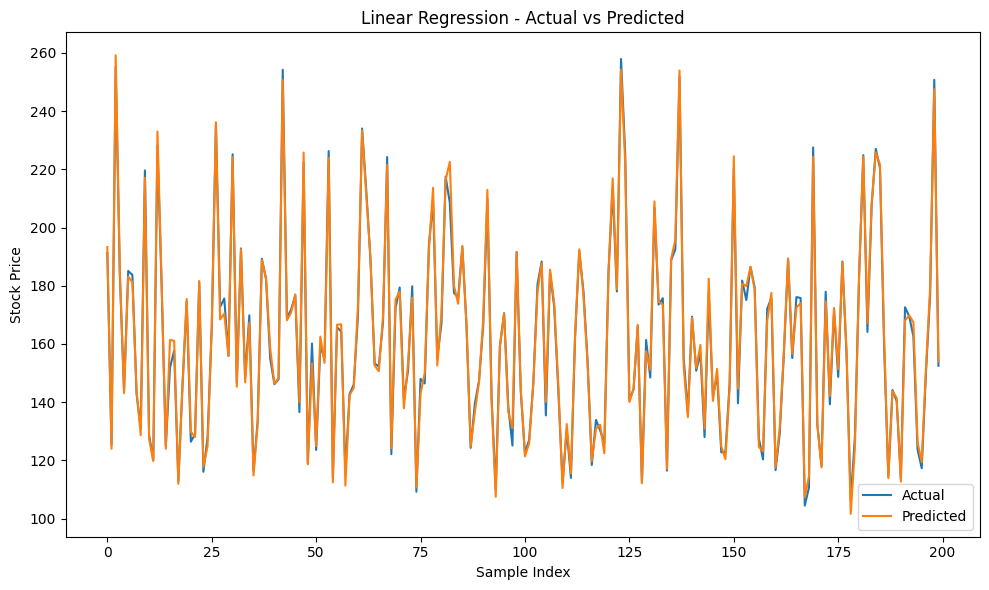

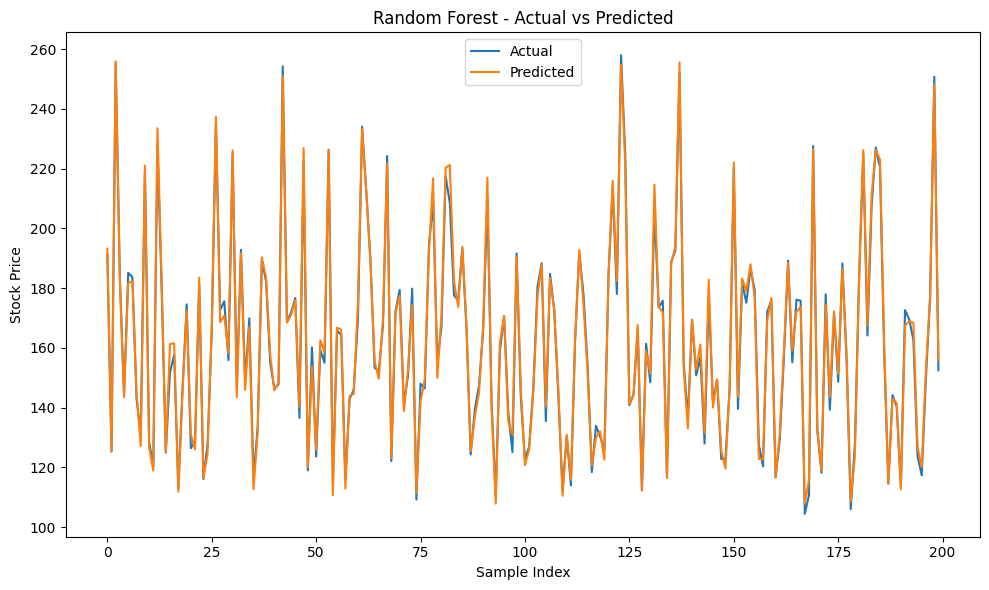

In [ ]:
# Plot
plot_predictions(y_test[:200], y_pred_lr[:200], "Linear Regression - Actual vs Predicted")
plot_predictions(y_test[:200], y_pred_rf[:200], "Random Forest - Actual vs Predicted")

In [ ]:
def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"📊 {name} Performance:")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}\n")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)


📊 Linear Regression Performance:
RMSE: 2.75
R² Score: 0.9936

📊 Random Forest Performance:
RMSE: 3.15
R² Score: 0.9917

